# **CDS Project: Part 3**

*Institute of Software Security (E22)*  
*Hamburg University of Technology*  

## Learning objectives
---

- Choose an ML model architecture for vulnerability prediction
- Preprocess the dataset you created in project part 2 to fit the model you selected
- Split the dataset for cross validation
- Create the model training pipeline, train the model using the train set and optimize the model using the test set
- Create loss graphs of the learning behaviour
- Generate predictions for the validation set
- Evaluate the results using appropriate metrics (add questions: reduce overfitting? optional 5-fold cross validation)


## Materials
---

- Lecture Slides 2, 3, 5 and 6, 9.
- PyTorch Documentation: [Datasets and Data Loaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)
-


## Project Description

In this project, you will create, train and evaluate your own machine learning model to predict vulnerabilities in source code. In addition, you will preprocess the data to prepare it to be used in the learning pipeline.
You will be using the dataset created in part 2 in this part.

## **Task 1**

- There are several ML model architectures that you can use for vulnerabilitiy prediction such as RNN, CNN, Multilabel Perceptron (MLP), Gated Recurrent Units (GRU) and so on. Choose a suitable ML model architecture for your project based on the strenghts and weaknesses of these algorithms.

- For the model architecture, you can choose from 2 paths:
  1. Preprocess the functions into vectors and continue the learning process similar to project 1.
  For instance, the code in the dataset needs to be converted into some type of vector representation that can be processed by a machine. After selecting a suitable model, preprocess the content in your dataset accordingly. Several models are available to preprocess code data such as:
    - Code2Vec: https://code2vec.org/
    - CodeBERT: https://github.com/microsoft/CodeBERT/tree/master/UniXcoder
    - CodeT5: https://github.com/salesforce/CodeT5

  2. Choose a model architecture that is capable of handeling raw text inputs (LSTM, GRU, etc.) as an input layer. Further information on text processing using pytorch:
    - https://pytorch.org/text/stable/index.html
    - https://pytorch.org/tutorials/


## Task 2

- Split your dataset appropriately into train, test, and validation set and justify your split.  

In [2]:
# TODO: Load the dataset

# TODO: Split the dataset into train, test and validation set
# === Step 1: Upload file ===
from google.colab import files
uploaded = files.upload()  # Choose labeled_functions_dataset.csv

# === Step 2: Load the file ===
import pandas as pd

df = pd.read_csv('labeled_functions_dataset.csv')
print(df.head())  # preview data
print(df.info())  # check column names and types

# === Step 3: Prepare features and labels ===
X = df['code'].astype(str)   # make sure it's string
y = df['label'].astype(int)  # make sure it's integer

# === Step 4: Tokenize the code ===
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)

# Convert code into integer sequences
sequences = tokenizer.texts_to_sequences(X)

# === Step 5: Pad the sequences ===
max_length = 200  # adjust if needed
X_padded = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')
print('Padded sequence shape:', X_padded.shape)

# === Step 6: Split into train, validation, test ===
from sklearn.model_selection import train_test_split

# Split into train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_padded, y, test_size=0.3, random_state=42, stratify=y
)

# Split temp into validation (50% of temp) and test (50% of temp)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# === Step 7: Print shapes ===
print('Train set:', X_train.shape, y_train.shape)
print('Validation set:', X_val.shape, y_val.shape)
print('Test set:', X_test.shape, y_test.shape)


Saving labeled_functions_dataset.csv to labeled_functions_dataset.csv
                                                code  label
0  private void createClientListeners() {\r\n    ...      1
1  private void createClientListeners() {\r\n    ...      0
2  private void createClientSSLListeners() {\r\n ...      1
3  private void createClientSSLListeners() {\r\n ...      0
4  public void findStaticResource(String path, Ht...      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38255 entries, 0 to 38254
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   code    38255 non-null  object
 1   label   38255 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 597.9+ KB
None
Padded sequence shape: (38255, 200)
Train set: (26778, 200) (26778,)
Validation set: (5738, 200) (5738,)
Test set: (5739, 200) (5739,)


## Task 3
- Create a preprocessing and training/test pipeline. This can also be done in separate steps.
- Train the model on a small dataset (e.g.: 1000 samples depending on the computational capacity) and make sure everything is working properly
- Show a graph showing the changes in loss function druring the training epochs
- Select proper metrics to evaluate the performance of the model
- If everything works well, then change the model parameters (e.g: number of neurons, layer depth) and regenerate the results. Comapare these results with your previous results and elaborate your findings.

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_5          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
419/419 ━━━━━━━━━━━━━━━━━━━━ 45s 102ms/step - accuracy: 0.5829 - loss: 0.6634 - precision: 0.5588 - recall: 0.2764 - val_accuracy: 0.6623 - val_loss: 0.5778 - val_precision: 0.7303 - val_recall: 0.3681
Epoch 2/10
419/419 ━━━━━━━━━━━━━━━━━━━━ 83s 104ms/step - accuracy: 0.7032 - loss: 0.5333 - precision: 0.6988 - recall: 0.5790 - val_accuracy: 0.6586 - val_loss: 0.5344 - val_precision: 0.6341 - val_recall: 0.5293
Epoch 3/10
419/419 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.7488 - loss: 0.4499 - precision: 0.7314 - recall: 0.6710 - val_accuracy: 0.6713 - val_loss: 0.5248 - val_precision: 0.6538 - val_recall: 0.5372
Epoch 4/10
419/419 ━━━━━━━━━━━━━━━━━━━━ 42s 101ms/step - accuracy: 0.7831 - loss: 0.3968 - precision: 0.7759 - recall: 0.7221 - val_accuracy: 0.6751 - val_loss: 0.5314 - val_precision: 0.6414 - val_recall: 0.5931
Epoch 5/10
419/419 ━━━━━━━━━━━━━━━━━━━━ 45s 107ms/step - accuracy: 0.7992 - loss: 0.3548 - precision: 0.8117 - recall: 0.7146 - val_accuracy: 0.6882

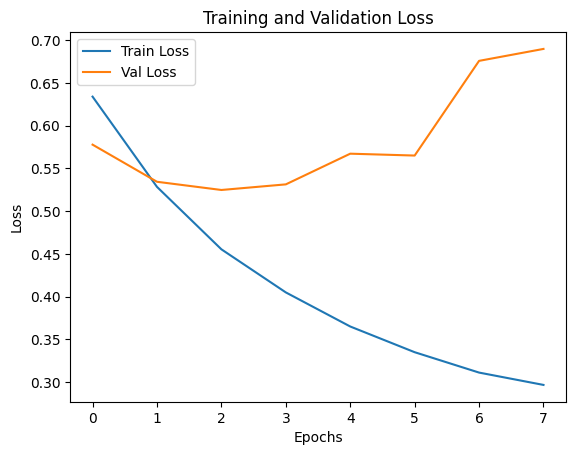

180/180 - 2s - 11ms/step - accuracy: 0.6738 - loss: 0.5246 - precision: 0.6538 - recall: 0.5491
Test accuracy: 0.6738
Test recall: 0.5491
Test precision: 0.6538
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
Test F1 score: 0.5969


In [8]:
#CNN-only model

import tensorflow as tf
from tensorflow.keras import layers, models, metrics
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

vocab_size = 10000
embedding_dim = 128

# Build the model
model = models.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    layers.Conv1D(filters=64, kernel_size=5, activation='relu'),
    layers.GlobalMaxPooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy', metrics.Recall(name='recall'), metrics.Precision(name='precision')]
)

model.summary()

# EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64,
    callbacks=[early_stopping]
)

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluate on test set
test_loss, test_acc, test_recall, test_precision = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test recall: {test_recall:.4f}')
print(f'Test precision: {test_precision:.4f}')


# Predict and calculate F1 score
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
f1 = f1_score(y_test, y_pred)
print(f"Test F1 score: {f1:.4f}")



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_6          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
419/419 ━━━━━━━━━━━━━━━━━━━━ 222s 516ms/step - accuracy: 0.4418 - loss: 0.9719 - precision: 0.4413 - recall: 0.9905 - val_accuracy: 0.4399 - val_loss: 0.7332 - val_precision: 0.4399 - val_recall: 1.0000
Epoch 2/20
419/419 ━━━━━━━━━━━━━━━━━━━━ 270s 535ms/step - accuracy: 0.4549 - loss: 0.9248 - precision: 0.4434 - recall: 0.9835 - val_accuracy: 0.5749 - val_loss: 0.6866 - val_precision: 0.5111 - val_recall: 0.7761
Epoch 3/20
419/419 ━━━━━━━━━━━━━━━━━━━━ 261s 532ms/step - accuracy: 0.5889 - loss: 0.8583 - precision: 0.5215 - recall: 0.8831 - val_accuracy: 0.5993 - val_loss: 0.6511 - val_precision: 0.5315 - val_recall: 0.7524
Epoch 4/20
419/419 ━━━━━━━━━━━━━━━━━━━━ 224s 534ms/step - accuracy: 0.6522 - loss: 0.7908 - precision: 0.5692 - recall: 0.8560 - val_accuracy: 0.6060 - val_loss: 0.6657 - val_precision: 0.5324 - val_recall: 0.8558
Epoch 5/20
419/419 ━━━━━━━━━━━━━━━━━━━━ 262s 533ms/step - accuracy: 0.6755 - loss: 0.7404 - precision: 0.5893 - recall: 0.8731 - val_accuracy: 0

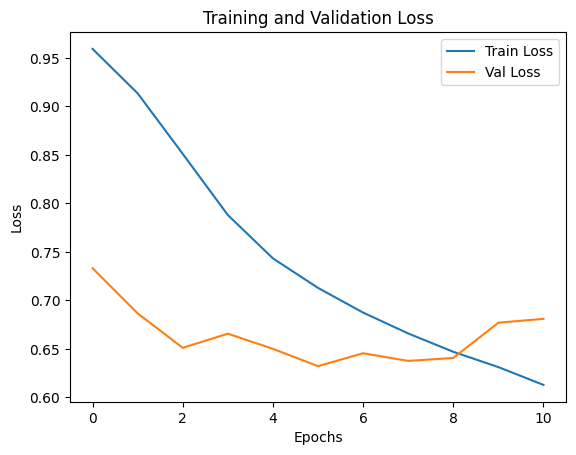

180/180 - 12s - 66ms/step - accuracy: 0.6332 - loss: 0.6367 - precision: 0.5611 - recall: 0.7627
Test accuracy: 0.6332
Test recall: 0.7627
Test precision: 0.5611
180/180 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step
Test F1 score: 0.6465


In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models, metrics
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

vocab_size = 10000
embedding_dim = 128

# Build the model
model = models.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
    layers.GlobalMaxPooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=1e-4),
    metrics=['accuracy', metrics.Recall(name='recall'), metrics.Precision(name='precision')]
)

model.summary()

# EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64,
    class_weight={0: 1.0, 1: 2.0},  # up-weight class 1
    callbacks=[early_stopping]
)

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluate on test set
test_loss, test_acc, test_recall, test_precision = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test recall: {test_recall:.4f}')
print(f'Test precision: {test_precision:.4f}')

# Predict and calculate F1 score
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
f1 = f1_score(y_test, y_pred)
print(f"Test F1 score: {f1:.4f}")


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_4          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
419/419 ━━━━━━━━━━━━━━━━━━━━ 116s 261ms/step - accuracy: 0.4445 - loss: 0.9739 - precision: 0.4381 - recall: 0.9346 - val_accuracy: 0.4399 - val_loss: 0.7385 - val_precision: 0.4399 - val_recall: 1.0000
Epoch 2/20
419/419 ━━━━━━━━━━━━━━━━━━━━ 136s 247ms/step - accuracy: 0.4477 - loss: 0.9297 - precision: 0.4438 - recall: 0.9951 - val_accuracy: 0.5127 - val_loss: 0.7138 - val_precision: 0.4729 - val_recall: 0.9398
Epoch 3/20
419/419 ━━━━━━━━━━━━━━━━━━━━ 147s 260ms/step - accuracy: 0.5838 - loss: 0.8682 - precision: 0.5174 - recall: 0.8792 - val_accuracy: 0.5796 - val_loss: 0.6816 - val_precision: 0.5137 - val_recall: 0.8292
Epoch 4/20
419/419 ━━━━━━━━━━━━━━━━━━━━ 140s 257ms/step - accuracy: 0.6556 - loss: 0.7905 - precision: 0.5722 - recall: 0.8538 - val_accuracy: 0.6175 - val_loss: 0.6438 - val_precision: 0.5442 - val_recall: 0.8019
Epoch 5/20
419/419 ━━━━━━━━━━━━━━━━━━━━ 143s 260ms/step - accuracy: 0.6942 - loss: 0.7236 - precision: 0.6044 - recall: 0.8824 - val_accuracy: 0

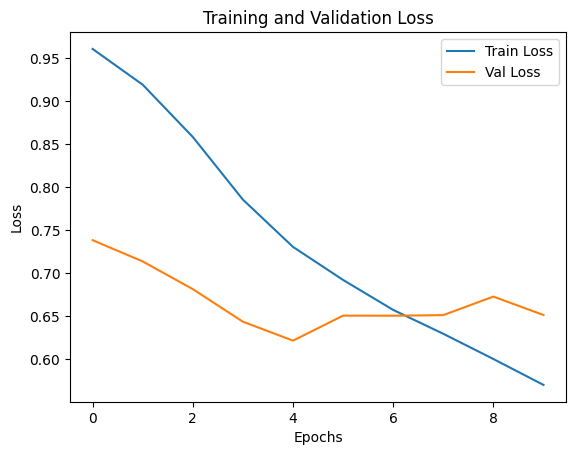

180/180 - 7s - 40ms/step - accuracy: 0.6175 - loss: 0.6331 - precision: 0.5444 - recall: 0.7983
Test accuracy: 0.6175
Test recall: 0.7983
Test precision: 0.5444
180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step
Test F1 score: 0.6474


In [7]:
##hybrid CNN + BiLSTM model. 1

import tensorflow as tf
from tensorflow.keras import layers, models, metrics
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

vocab_size = 10000
embedding_dim = 128
max_length = 200  # same as used in padding

# Hybrid Model: CNN + BiLSTM
model = models.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim),

    # CNN Layer for extracting local features
    layers.Conv1D(filters=64, kernel_size=5, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    # BiLSTM Layer for learning sequence patterns
    layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
    layers.GlobalMaxPooling1D(),

    # Dense layers
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=1e-4),
    metrics=['accuracy', metrics.Recall(name='recall'), metrics.Precision(name='precision')]
)

model.summary()

# EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64,
    class_weight={0: 1.0, 1: 2.0},  # handle imbalance if needed
    callbacks=[early_stopping]
)

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluate on test set
test_loss, test_acc, test_recall, test_precision = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test recall: {test_recall:.4f}')
print(f'Test precision: {test_precision:.4f}')

# Predict and calculate F1 score
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
f1 = f1_score(y_test, y_pred)
print(f"Test F1 score: {f1:.4f}")


In [6]:
#hybrid CNN + BiLSTM model. 2

import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import f1_score

# Define model parameters
embedding_dim = 128
max_length = X_train.shape[1]  # should match your padded input length
vocab_size = 10000  # example, replace with actual size

# Build the model
model = Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),

    layers.Conv1D(128, 5, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
    layers.GlobalMaxPooling1D(),

    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),

    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=1e-4),
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

model.summary()

# Class weights: tweak as needed
class_weights = {0: 1.0, 1: 1.2}

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, checkpoint],
    class_weight=class_weights,
    verbose=2
)

# Evaluate on test data
print("\nEvaluating on test data...")
results = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {results[1]:.4f}")
print(f"Test precision: {results[2]:.4f}")
print(f"Test recall: {results[3]:.4f}")

# Predict and calculate F1 score
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
f1 = f1_score(y_test, y_pred)
print(f"Test F1 score: {f1:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_3          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
419/419 - 140s - 334ms/step - accuracy: 0.5598 - loss: 0.8133 - precision: 0.4995 - recall: 0.3390 - val_accuracy: 0.5673 - val_loss: 0.7291 - val_precision: 0.5070 - val_recall: 0.5915
Epoch 2/20
419/419 - 122s - 292ms/step - accuracy: 0.6003 - loss: 0.7548 - precision: 0.5492 - recall: 0.5093 - val_accuracy: 0.6093 - val_loss: 0.6733 - val_precision: 0.5578 - val_recall: 0.5392
Epoch 3/20
419/419 - 137s - 327ms/step - accuracy: 0.6574 - loss: 0.6840 - precision: 0.6083 - recall: 0.6209 - val_accuracy: 0.6293 - val_loss: 0.6308 - val_precision: 0.6024 - val_recall: 0.4628
Epoch 4/20
419/419 - 146s - 349ms/step - accuracy: 0.6933 - loss: 0.6262 - precision: 0.6478 - recall: 0.6631 - val_accuracy: 0.6387 - val_loss: 0.6170 - val_precision: 0.5824 - val_recall: 0.6315
Epoch 5/20
419/419 - 140s - 335ms/step - accuracy: 0.7170 - loss: 0.5847 - precision: 0.6629 - recall: 0.7257 - val_accuracy: 0.6323 - val_loss: 0.6264 - val_precision: 0.5648 - val_recall: 0.7143
Epoch 6/20
419/